In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\mvsha\AppData\Local\Temp\ipykernel_492\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [14]:
(books.iloc[187689]['Book-Author'] = 'Downes, Larissa Anne')

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1371717409.py, line 1)

# Exploratory Data Analysis(EDA)

Missing Values Check

In [18]:
print(books.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [20]:
print(users.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [22]:
print(ratings.isnull().sum())

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [24]:
ratings.dropna(inplace=True)

In [28]:
# Examine DataFrames
print("Books DataFrame:")
print(books.shape)
print(books.info())
print(books.describe())
print(books.isnull().sum())
print(books[['Book-Author', 'Publisher']].nunique())
print(books['Year-Of-Publication'].value_counts())


print("\nRatings DataFrame:")
print(ratings.shape)
print(ratings.info())
print(ratings.describe())
print(ratings.isnull().sum())
print(ratings['Book-Rating'].value_counts())

print("\nUsers DataFrame:")
print(users.shape)
print(users.info())
print(users.describe())
print(users.isnull().sum())
print(users['Location'].nunique())
print(users['Age'].value_counts())

Books DataFrame:
(271360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq       

Ratings Dataset Analysis

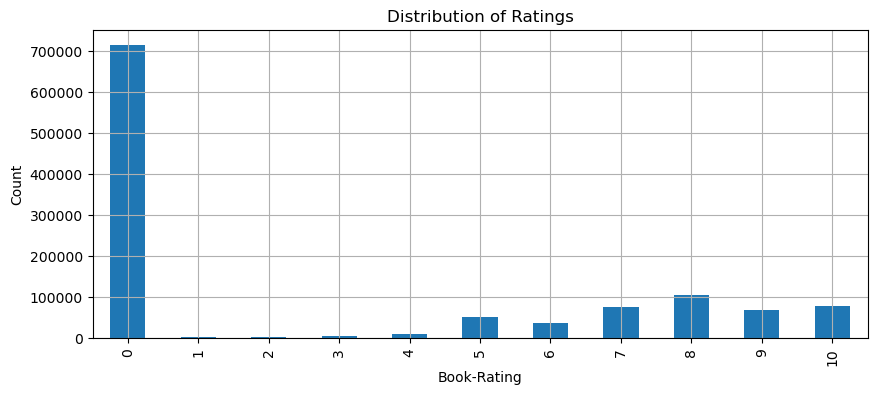

In [28]:
ratings['Book-Rating'].describe()
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title('Distribution of Ratings')
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Users Dataset Analysis

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


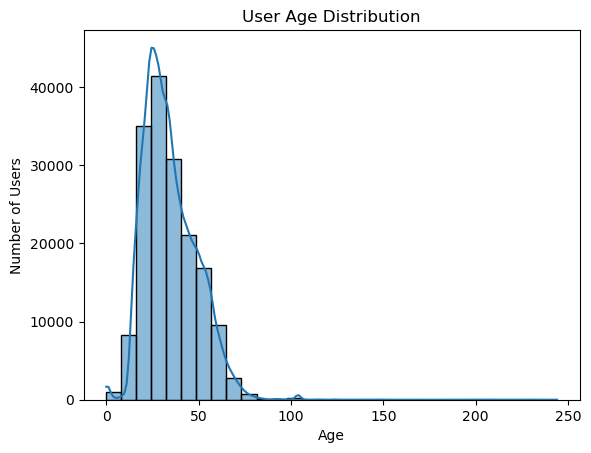

In [32]:
users['Age'].describe()
sns.histplot(users['Age'], bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

In [36]:
#Filter out unrealistic ages
users = users[(users['Age'] >= 10) & (users['Age'] <= 100)]

In [38]:
users

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


Books Dataset Analysis

In [47]:
print(books['title'].nunique())
top_books = ratings['book_id'].value_counts().head(10)
top_books_titles = books[books['book_id'].isin(top_books.index)][['book_id', 'title']]
print(top_books_titles)

top_books.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Most Rated Books")
plt.xlabel("Book ID")
plt.ylabel("Number of Ratings")
plt.show()

KeyError: 'title'

#### Merge for Combined Analysis

In [58]:
merged_df = ratings.merge(books, on='ISBN').merge(users, on='User-ID')
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
3,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0


#### Ratings per User and per Book

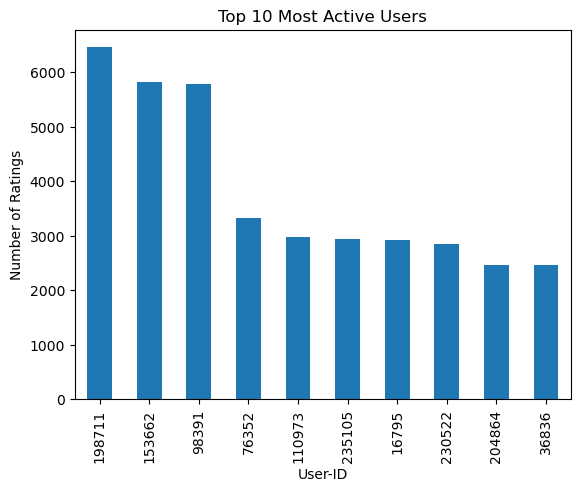

In [67]:
user_ratings_count = merged_df.groupby('User-ID')['Book-Rating'].count()
book_ratings_count = merged_df.groupby('ISBN')['Book-Rating'].count()

# Top 10 active users
user_ratings_count.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Most Active Users")
plt.ylabel("Number of Ratings")
plt.show()

#### Heatmap for Sparsity

In [78]:
user_item_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
sns.heatmap(user_item_matrix.iloc[:20, :20], cmap='coolwarm')
plt.title("User-Item Rating Heatmap (20x20)")
plt.show()

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

####  Correlation 

In [81]:
correlation = user_item_matrix.corr(method='pearson')
print(correlation.head())

NameError: name 'user_item_matrix' is not defined

## 👤 User Age Distribution

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


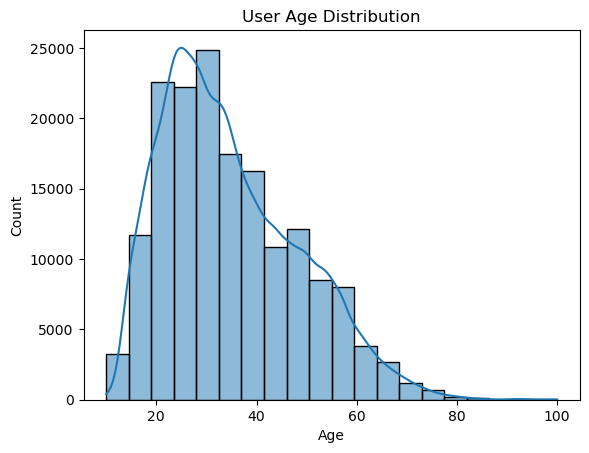

In [85]:
users = users[(users['Age'] >= 10) & (users['Age'] <= 100)]
sns.histplot(users['Age'], bins=20, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 📚 Most Rated Books

            ISBN                                       Book-Title
26    0971880107                                      Wild Animus
118   0671027360                              Angels &amp; Demons
305   044023722X                                  A Painted House
356   0142001740                          The Secret Life of Bees
408   0316666343                        The Lovely Bones: A Novel
522   0312195516              The Red Tent (Bestselling Backlist)
748   0385504209                                The Da Vinci Code
1105  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel
1922  067976402X                           Snow Falling on Cedars


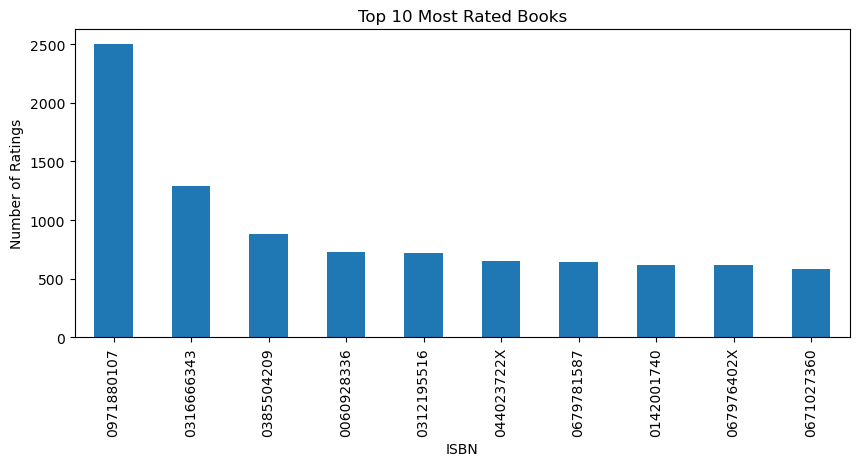

In [91]:
top_books = ratings['ISBN'].value_counts().head(10)
top_books_titles = books[books['ISBN'].isin(top_books.index)][['ISBN', 'Book-Title']]
print(top_books_titles)

top_books.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Most Rated Books")
plt.xlabel("ISBN")
plt.ylabel("Number of Ratings")
plt.show()

## 🔗 Merge Datasets

In [94]:
merged_df = ratings.merge(books, on='ISBN').merge(users, on='User-ID')
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
3,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0


## 🧑‍💻 Most Active Users

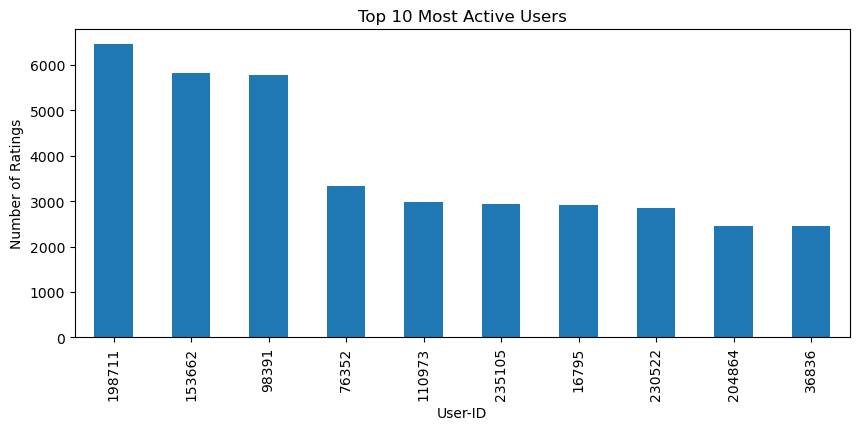

In [97]:
user_activity = merged_df.groupby('User-ID')['Book-Rating'].count().sort_values(ascending=False).head(10)
user_activity.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Most Active Users")
plt.ylabel("Number of Ratings")
plt.show()

## 🔥 Heatmap of User-Item Matrix (Sample)

In [100]:
user_item_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
sns.heatmap(user_item_matrix.iloc[:10, :10], cmap='coolwarm')
plt.title("User-Item Rating Heatmap (10x10 Sample)")
plt.show()

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

## 📈 Ratings Distribution


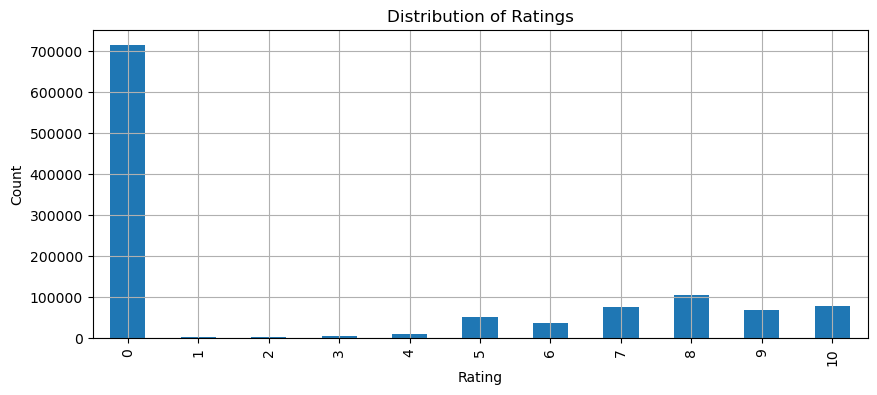

In [103]:
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

NameError: name 'books' is not defined

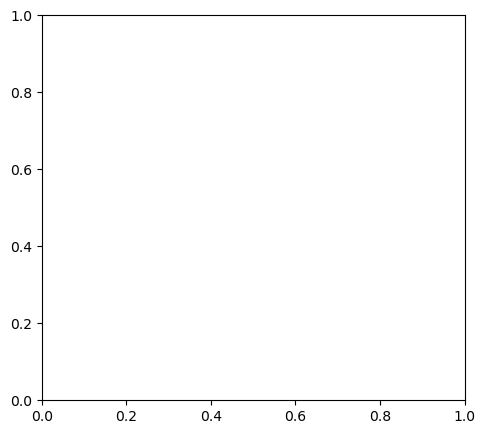

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's create two visualizations: 
# (1) A bar plot for the count of books by Publisher
# (2) A histogram of Year-Of-Publication

plt.figure(figsize=(12, 5))

# Bar plot for Publishers
plt.subplot(1, 2, 1)
publisher_counts = books['Publisher'].value_counts()
sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Books by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Count')

# Histogram for Year-Of-Publication
plt.subplot(1, 2, 2)
sns.histplot(books['Year-Of-Publication'], bins=10, kde=False, color='steelblue')
plt.title('Distribution of Year-Of-Publication')
plt.xlabel('Year Of Publication')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
print('Visualizations generated')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataframes as df_books, df_ratings, df_users

# Merge the datasets to link age with ratings and book titles
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
merged_df = pd.merge(merged_df, df_users, on='User-ID')

# Define age groups (adjust ranges as needed)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# Grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Group', y='Book-Rating', data=merged_df, palette='viridis')
plt.title('Average Book Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Book-Rating', data=merged_df, palette='viridis')
plt.title('Distribution of Book Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Book Rating')
plt.show()

NameError: name 'df_ratings' is not defined